# Portafolio Project

## Author: Jose Cortes Ramos

### Data set Fuente: https://ourworldindata.org/covid-deaths


## Project: Data analysis of Covid-19
### Case: Data analyst of the COVID - 19 in a global view and also Get crucial information about the country Chile.

### *You are allow to use any tool that you want.*

## 1) Clearly define the problem you are trying to solve.
This includes identifying the business goals, the key metrics that will be used to measure success, and the target audience for the analysis.

- Number of people who got covid in Chile. (contagiados)    
- What is the death rate in Chile, compare with the world, Was it higher or lower ?
- hasta que cifra haciende la cantidad de muertes ?
- How many people are vaccinated in Chile.


Here you have some question that I want You to answer.

<li>¿Cuál es la distribución de casos de Covid en el tiempo?</li>
<li>¿Cuál es la distribución de casos de Covid por ubicación geográfica?</li>
<li>¿Cuál es la tasa de mortalidad de los casos de Covid?</li>
<li>¿Cuál es la tasa de positividad de las pruebas de Covid?</li>
<li>¿Cuál es la tasa de hospitalización de los casos de Covid?</li>
<li>¿Cuál es la relación entre los casos de Covid y la vacunación?</li>
<li>¿Cuál es la relación entre los casos de Covid y las medidas de distanciamiento social?</li>
<li>¿Cuál es la relación entre los casos de Covid y el uso de mascarillas?</li>

## 2) Collecting the data

 This may involve sourcing data from various internal and external sources, cleaning and preparing the data for analysis, and ensuring that the data is of sufficient quality to be used.

In [1]:
# Packages
import pandas as pd # Import, export, data manipulation.
import numpy as np # numbers, types , 
import matplotlib.pyplot as plt #charts Plots
import seaborn as sns # plots

%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/chuo_/Desktop/Archivos/Chuo/2023/Analisis de datos/Portafolio/Projects/Covid/Data sets/owid-covid-data.csv')

Lets get some info of the Data Frame

In [3]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
#Columns and rows
print(f'Total of Rows and Columns {df.shape} \n')

#Data info
# print(f'{df.info()}')

Total of Rows and Columns (299070, 67) 



In [6]:
df.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                 float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [7]:
df['date'] = pd.to_datetime(df['date']) #Convert datatype of the date col

### First Look to the data shows that are total of 67 columns, to manage the scenary.


#### To get the information of the scenary we going to select some of the columns that are important to us.
- location
- pupulation
- date
- total_cases
- new_cases
- total_deaths
- new_deaths
- new_vaccinations

Also if we need other data, we could combine with differents sources.
 

### Data cleaning
#### We going to divide the entire df to a much smaller one, to start our analysis.

In [8]:
df_1= df.loc[:,['continent','location','date','population','total_cases','new_cases','total_deaths','new_deaths','new_vaccinations']]
df_1.head()

,continent,location,date,population,total_cases,new_cases,total_deaths,new_deaths,new_vaccinations
0,Asia,Afghanistan,2020-01-03,41128772.0,NaN,0.0,NaN,0.0,NaN
1,Asia,Afghanistan,2020-01-04,41128772.0,NaN,0.0,NaN,0.0,NaN
2,Asia,Afghanistan,2020-01-05,41128772.0,NaN,0.0,NaN,0.0,NaN
3,Asia,Afghanistan,2020-01-06,41128772.0,NaN,0.0,NaN,0.0,NaN
4,Asia,Afghanistan,2020-01-07,41128772.0,NaN,0.0,NaN,0.0,NaN


#### Check for missing values (NaN) in each column

In [9]:
print(df_1.isnull().sum())

continent            14202
location                 0
date                     0
population               0
total_cases          35716
new_cases             8466
total_deaths         55841
new_deaths            8384
new_vaccinations    238144
dtype: int64


In [10]:
df_1.isnull().sum()

continent            14202
location                 0
date                     0
population               0
total_cases          35716
new_cases             8466
total_deaths         55841
new_deaths            8384
new_vaccinations    238144
dtype: int64

#### There are a lot of missing values on the columns:
if you remember there are 299.070 rows and 67 columns.


<ol>* continent: 14202 </ol>
<ol>* total_cases: 35716</ol>
<ol>* new_cases: 8466</ol>
<ol>* total_deaths: 55841</ol>
<ol>* new_deaths: 8384</ol>
<ol>* new_vaccinations: 238.144</ol>


In [11]:
df_1.set_index('date')

,continent,location,population,total_cases,new_cases,total_deaths,new_deaths,new_vaccinations
date,,,,,,,,
2020-01-03,Asia,Afghanistan,41128772.0,NaN,0.0,NaN,0.0,NaN
2020-01-04,Asia,Afghanistan,41128772.0,NaN,0.0,NaN,0.0,NaN
2020-01-05,Asia,Afghanistan,41128772.0,NaN,0.0,NaN,0.0,NaN
2020-01-06,Asia,Afghanistan,41128772.0,NaN,0.0,NaN,0.0,NaN
2020-01-07,Asia,Afghanistan,41128772.0,NaN,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...
2023-03-25,Africa,Zimbabwe,16320539.0,264508.0,4.0,5679.0,0.0,NaN
2023-03-26,Africa,Zimbabwe,16320539.0,264509.0,1.0,5679.0,0.0,NaN
2023-03-27,Africa,Zimbabwe,16320539.0,264511.0,2.0,5679.0,0.0,NaN


In [12]:
df_1.iloc[-10:,:]

,continent,location,date,population,total_cases,new_cases,total_deaths,new_deaths,new_vaccinations
299060,Africa,Zimbabwe,2023-03-20,16320539.0,264456.0,8.0,5678.0,0.0,NaN
299061,Africa,Zimbabwe,2023-03-21,16320539.0,264470.0,14.0,5678.0,0.0,NaN
299062,Africa,Zimbabwe,2023-03-22,16320539.0,264475.0,5.0,5679.0,1.0,NaN
299063,Africa,Zimbabwe,2023-03-23,16320539.0,264490.0,15.0,5679.0,0.0,NaN
299064,Africa,Zimbabwe,2023-03-24,16320539.0,264504.0,14.0,5679.0,0.0,NaN
299065,Africa,Zimbabwe,2023-03-25,16320539.0,264508.0,4.0,5679.0,0.0,NaN
299066,Africa,Zimbabwe,2023-03-26,16320539.0,264509.0,1.0,5679.0,0.0,NaN
299067,Africa,Zimbabwe,2023-03-27,16320539.0,264511.0,2.0,5679.0,0.0,NaN
299068,Africa,Zimbabwe,2023-03-28,16320539.0,264511.0,0.0,5679.0,0.0,NaN
299069,Africa,Zimbabwe,2023-03-29,16320539.0,264511.0,0.0,5679.0,0.0,NaN


In [13]:
df_1.loc[df_1.new_cases.notnull()]

,continent,location,date,population,total_cases,new_cases,total_deaths,new_deaths,new_vaccinations
0,Asia,Afghanistan,2020-01-03,41128772.0,NaN,0.0,NaN,0.0,NaN
1,Asia,Afghanistan,2020-01-04,41128772.0,NaN,0.0,NaN,0.0,NaN
2,Asia,Afghanistan,2020-01-05,41128772.0,NaN,0.0,NaN,0.0,NaN
3,Asia,Afghanistan,2020-01-06,41128772.0,NaN,0.0,NaN,0.0,NaN
4,Asia,Afghanistan,2020-01-07,41128772.0,NaN,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...
299065,Africa,Zimbabwe,2023-03-25,16320539.0,264508.0,4.0,5679.0,0.0,NaN
299066,Africa,Zimbabwe,2023-03-26,16320539.0,264509.0,1.0,5679.0,0.0,NaN
299067,Africa,Zimbabwe,2023-03-27,16320539.0,264511.0,2.0,5679.0,0.0,NaN
299068,Africa,Zimbabwe,2023-03-28,16320539.0,264511.0,0.0,5679.0,0.0,NaN


In [14]:
df_1.loc[df_1.location.isin(['Italy','France'])]

,continent,location,date,population,total_cases,new_cases,total_deaths,new_deaths,new_vaccinations
89779,Europe,France,2020-01-03,67813000.0,NaN,0.0,NaN,0.0,NaN
89780,Europe,France,2020-01-04,67813000.0,NaN,0.0,NaN,0.0,NaN
89781,Europe,France,2020-01-05,67813000.0,NaN,0.0,NaN,0.0,NaN
89782,Europe,France,2020-01-06,67813000.0,NaN,0.0,NaN,0.0,NaN
89783,Europe,France,2020-01-07,67813000.0,NaN,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...
128762,Europe,Italy,2023-03-27,59037472.0,25673442.0,NaN,188933.0,NaN,866.0
128763,Europe,Italy,2023-03-28,59037472.0,25673442.0,NaN,188933.0,NaN,1054.0
128764,Europe,Italy,2023-03-29,59037472.0,25673442.0,NaN,188933.0,NaN,1087.0
128765,Europe,Italy,2023-03-30,59037472.0,NaN,NaN,NaN,NaN,971.0


## Python missing data columns

In [15]:
# missing_data = df_deaths_covid.isnull()
# missing_data.head(5)

In [16]:
# for column in missing_data.columns.values.tolist():
#     print(column)
#     print (missing_data[column].value_counts())
#     print("")    

### NaN Values
Nan values that appear in our first selected dataframe df_death could give us differentes opcionts to analysis too.

There are these options
- drop every row that has nan  values.
- Replace with mean or median

Make sure you understand it.

Drop code here

In [17]:
#drop las colunmas nan

Replace every row mean or median

In [18]:
#Replace every row for median

## 3) Exploring the data.
Once the data has been collected, the next step is to explore it to gain insights and identify patterns or trends. This may involve visualizing the data using charts and graphs, performing descriptive statistics, and identifying outliers or anomalies.

### Data frame manipulation

Death Rate: total deaths vs total cases

In [19]:
df_1.loc[:,'death_rate'] = (df_1['total_deaths'])/(df_1['total_cases'])*100

Wich country has the biggest 

Cases Rate: Total cases vs population

In [20]:
df_1.loc[:,'cases_rate'] = (df_1['total_cases']/df_1['population'])*100

In [39]:
# xd = (df.total_deaths/df.total_cases).idxmax()
# xd2 = df.loc[xd, 'location']
# print(f'el valor de xd es: {xd} y el de xd2 es :{xd2}')

el valor de xd es: 163926 y el de xd2 es :Mauritania


In [21]:
df_1

,continent,location,date,population,total_cases,new_cases,total_deaths,new_deaths,new_vaccinations,death_rate,cases_rate
0,Asia,Afghanistan,2020-01-03,41128772.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN
1,Asia,Afghanistan,2020-01-04,41128772.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN
2,Asia,Afghanistan,2020-01-05,41128772.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN
3,Asia,Afghanistan,2020-01-06,41128772.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN
4,Asia,Afghanistan,2020-01-07,41128772.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
299065,Africa,Zimbabwe,2023-03-25,16320539.0,264508.0,4.0,5679.0,0.0,NaN,2.147005,1.620706
299066,Africa,Zimbabwe,2023-03-26,16320539.0,264509.0,1.0,5679.0,0.0,NaN,2.146997,1.620712
299067,Africa,Zimbabwe,2023-03-27,16320539.0,264511.0,2.0,5679.0,0.0,NaN,2.146981,1.620725
299068,Africa,Zimbabwe,2023-03-28,16320539.0,264511.0,0.0,5679.0,0.0,NaN,2.146981,1.620725


#### df = Group by continent with the highest deaths 

In [22]:
lotaion_continent_1 = df_1.groupby(['continent','location']).death_rate.mean().sort_values(ascending=False)
lotaion_continent_1

continent      location        
Africa         Mauritania          92.560155
Asia           Yemen               21.293758
South America  Peru                 8.335306
North America  Mexico               8.132677
Africa         Sudan                8.086779
                                     ...    
Oceania        Niue                      NaN
               Pitcairn                  NaN
               Tokelau                   NaN
               Tuvalu                    NaN
South America  Falkland Islands          NaN
Name: death_rate, Length: 243, dtype: float64

In [23]:
lotaion_continent = df_1.groupby(['continent','location']).death_rate.agg(['mean']).sort_values(by='mean',ascending=False)
lotaion_continent

mean
continent     location                   
Africa        Mauritania        92.560155
Asia          Yemen             21.293758
South America Peru               8.335306
North America Mexico             8.132677
Africa        Sudan              8.086779
...                                   ...
Oceania       Niue                    NaN
              Pitcairn                NaN
              Tokelau                 NaN
              Tuvalu                  NaN
South America Falkland Islands        NaN

[243 rows x 1 columns]

In [24]:
df_continent = df_1.groupby('continent')
df_continent['total_deaths'].max().sort_values(ascending=False)

continent
North America    1117054.0
South America     699917.0
Asia              530841.0
Europe            397146.0
Africa            102595.0
Oceania            19511.0
Name: total_deaths, dtype: float64

#### Group by country

In [25]:
df_location = df_1.groupby(['location']) #seleccion de un df que contiene todo agrupado por pais
df_chile = df_location.get_group('Chile') #Seleccion de un dataframe solo de chile.

In [26]:
df_chile.head()

,continent,location,date,population,total_cases,new_cases,total_deaths,new_deaths,new_vaccinations,death_rate,cases_rate
50840,South America,Chile,2020-01-03,19603736.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN
50841,South America,Chile,2020-01-04,19603736.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN
50842,South America,Chile,2020-01-05,19603736.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN
50843,South America,Chile,2020-01-06,19603736.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN
50844,South America,Chile,2020-01-07,19603736.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN


In [27]:
# Crear una lista con los países de interés
paises = ['Chile'] #lista de paises a seleccionar 
df_paises = df_1[df_1['location'].isin(paises)] #

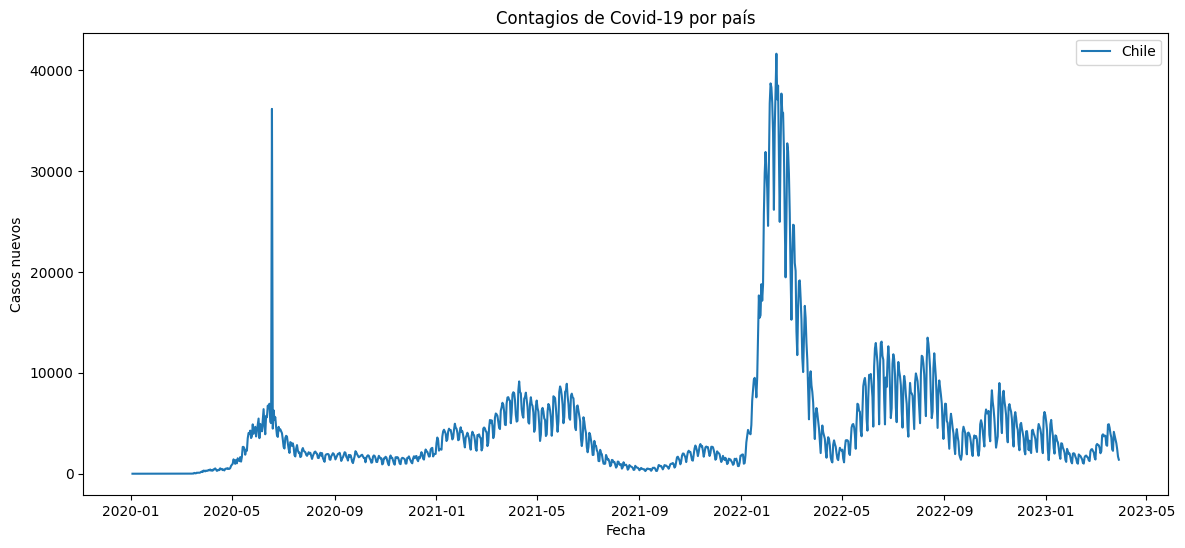

In [28]:
#creacion del grafico

fig, ax = plt.subplots(figsize=(14, 6))

for pais in paises:
    df_country = df_paises[df_paises['location'] == pais]
    ax.plot(df_country['date'], df_country['new_cases'], label = pais)

ax.set_xlabel('Fecha')
ax.set_ylabel('Casos nuevos')
ax.set_title('Contagios de Covid-19 por país')
ax.legend()
plt.show()

### Nuevos casos de vacunados

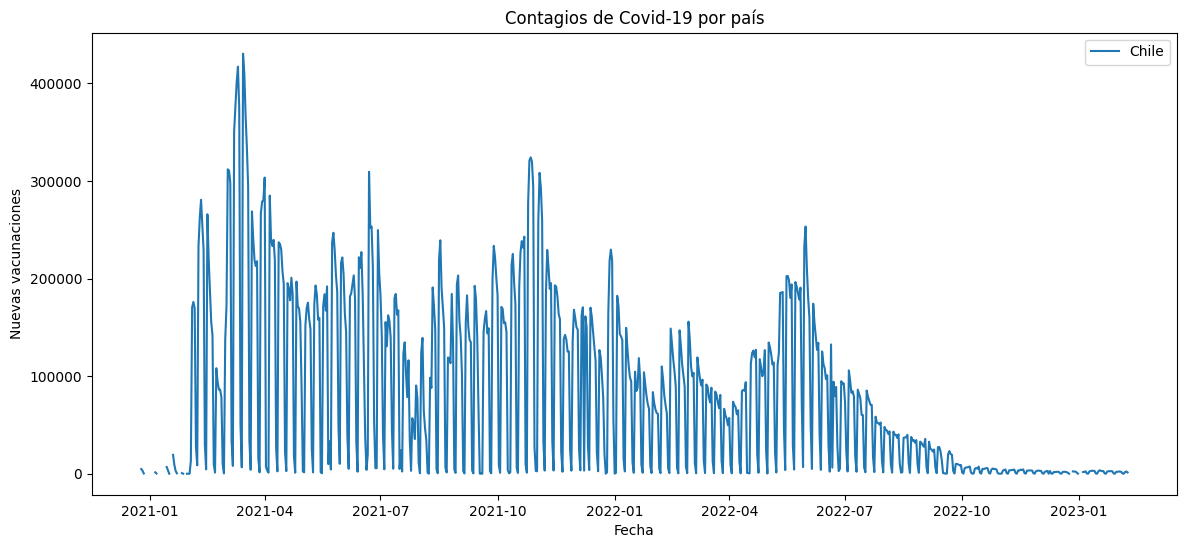

In [29]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(df_chile['date'], df_chile['new_vaccinations'], label = 'Chile')

ax.set_xlabel('Fecha')
ax.set_ylabel('Nuevas vacunaciones')
ax.set_title('Contagios de Covid-19 por país')
ax.legend()
plt.show()

## ¿Cuál es la distribución de casos de Covid en el tiempo, en chile?

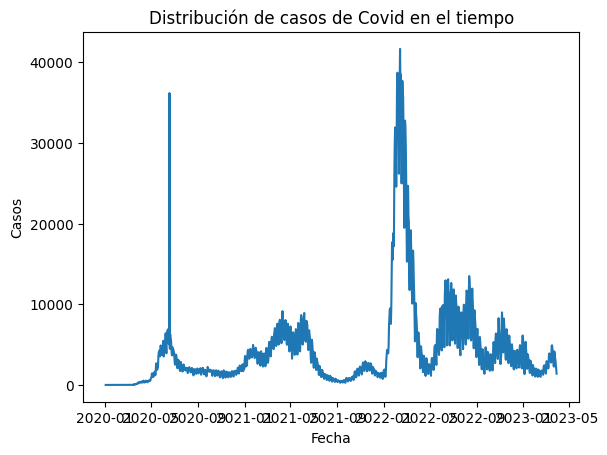

In [30]:
# Crear un gráfico de línea que muestra la cantidad de casos de Covid por día
plt.plot(df_chile['date'], df_chile['new_cases'])
plt.xlabel('Fecha')
plt.ylabel('Casos')
plt.title('Distribución de casos de Covid en el tiempo')
plt.show()

en el año 2020, 2021 , 2002

In [31]:
#Dateframe de covid en el ano 2020 en chile.
df_chile_2020 = df_chile.loc[df_chile['date'].dt.year == 2020]
#Dateframe de covid en el ano 2021 en chile.
df_chile_2021 = df_chile.loc[df_chile['date'].dt.year == 2021]
#Dateframe de covid en el ano 2022 en chile.
df_chile_2022 = df_chile.loc[df_chile['date'].dt.year == 2022]
#Dateframe de covid en el ano 2023 en chile.
df_chile_2023 = df_chile.loc[df_chile['date'].dt.year == 2023]


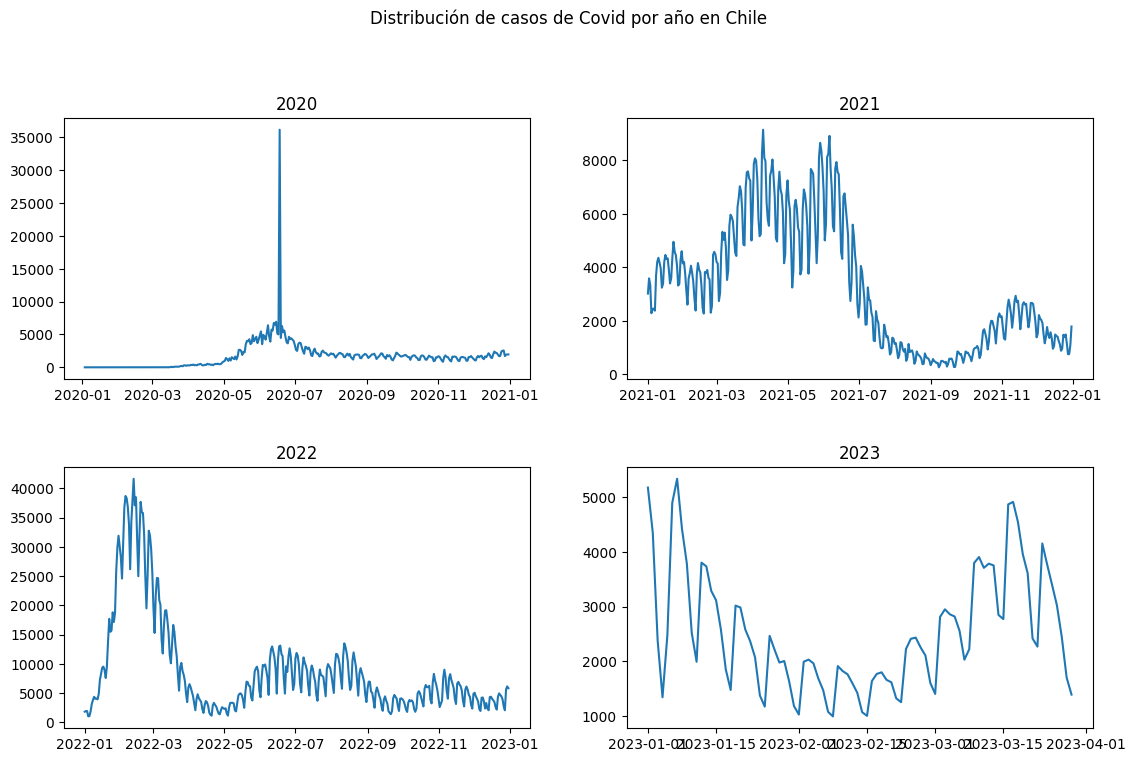

In [32]:
import matplotlib.pyplot as plt

# Crear la figura y los subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
ax_2020 = axes[0][0]
ax_2021 = axes[0][1]
ax_2022 = axes[1][0]
ax_2023 = axes[1][1]

# Trazar los datos en cada subplot
ax_2020.plot(df_chile_2020['date'], df_chile_2020['new_cases'], label='2020')
ax_2021.plot(df_chile_2021['date'], df_chile_2021['new_cases'], label='2021')
ax_2022.plot(df_chile_2022['date'], df_chile_2022['new_cases'], label='2022')
ax_2023.plot(df_chile_2023['date'], df_chile_2023['new_cases'], label='2023')

# Configurar los títulos y etiquetas de los ejes
ax_2020.set_title('2020')
ax_2021.set_title('2021')
ax_2022.set_title('2022')
ax_2023.set_title('2023')
fig.suptitle('Distribución de casos de Covid por año en Chile')
fig.tight_layout(pad=3.0)
plt.show()

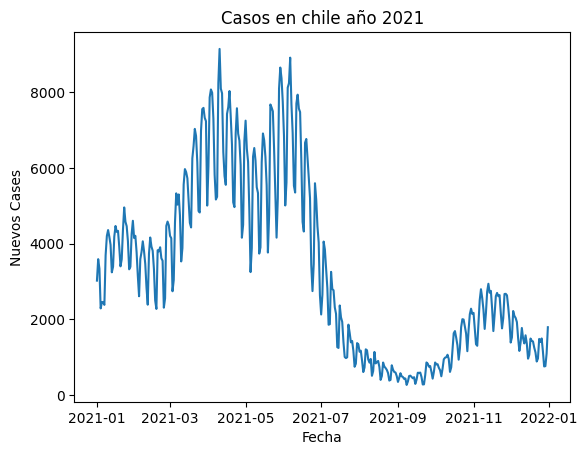

In [33]:
plt.plot(df_chile_2021['date'],df_chile_2021['new_cases'])
plt.xlabel('Fecha')
plt.ylabel('Nuevos Cases')
plt.title('Casos en chile año 2021')
plt.show()

# Que se deduce de la grafica ?

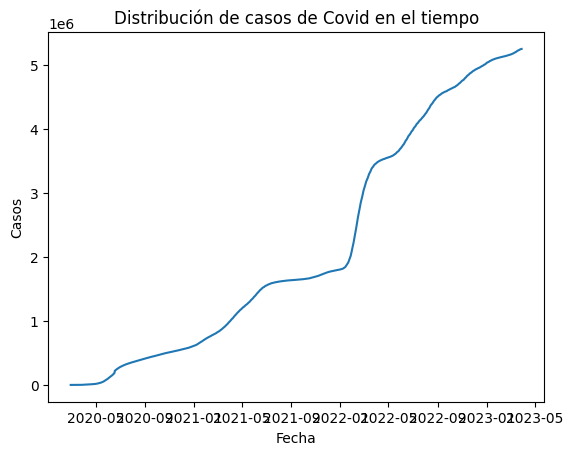

In [34]:
plt.plot(df_chile['date'], df_chile['total_cases'])
plt.xlabel('Fecha')
plt.ylabel('Casos')
plt.title('Distribución de casos de Covid en el tiempo')
plt.show()

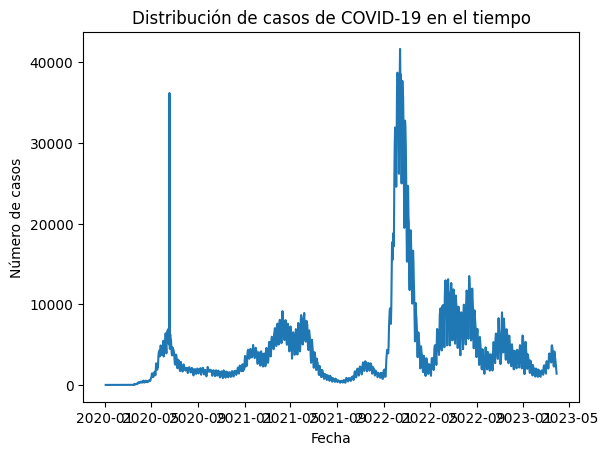

In [35]:
import numpy as np

x = np.arange(len(df_chile))
y = df_chile['new_cases'].values

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.plot(df_chile['date'], df_chile['new_cases'])
plt.plot(df_chile['date'], p(x), 'r--')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')
plt.title('Distribución de casos de COVID-19 en el tiempo')
plt.show()

C:\Users\chuo_\AppData\Local\Temp\ipykernel_18920\1136699146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chile.loc[:,'Daily Growth Rate'] = df_chile['new_cases'].pct_change()


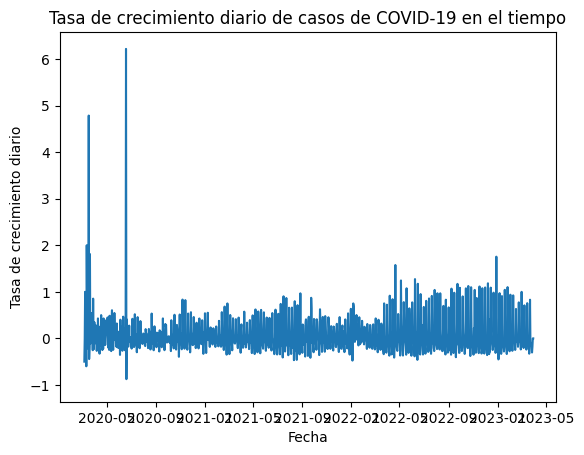

In [36]:
df_chile.loc[:,'Daily Growth Rate'] = df_chile['new_cases'].pct_change()

plt.plot(df_chile['date'], df_chile['Daily Growth Rate'])
plt.xlabel('Fecha')
plt.ylabel('Tasa de crecimiento diario')
plt.title('Tasa de crecimiento diario de casos de COVID-19 en el tiempo')
plt.show()

Manejo de valores NaN en continent

##### Solo los 10 paises con mayor numero de muerte, sin considerar los valores continents

In [37]:
df_country = df_1[~df_1['continent'].isnull()] #Filtro que retira todos los valores donde continente es null.
#df_country['total_deaths'] = pd.to_numeric(df_country['total_deaths']) # Pasasr a valor numerico

top_countries = df_country.groupby('location')
top_countries['total_deaths'].agg('max').sort_values(ascending=False).head(10)
#print(top_countries[['location','total_deaths']])

location
United States     1117054.0
Brazil             699917.0
India              530841.0
Russia             397146.0
Mexico             333449.0
Peru               219741.0
United Kingdom     210396.0
Italy              188933.0
Germany            170493.0
France             161857.0
Name: total_deaths, dtype: float64

10 paises con mayor cantidad de muertes y diferentes valores tambien

In [38]:
top_countries['date','location','population','total_cases','total_deaths','cases_population'].max().sort_values(by='cases_population', ascending=False).head(10)

C:\Users\chuo_\AppData\Local\Temp\ipykernel_18920\2931907082.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_countries['date','location','population','total_cases','total_deaths','cases_population'].max().sort_values(by='cases_population', ascending=False).head(10)


KeyError: "Columns not found: 'cases_population'"

Grafico de contagios a lo largo del tiempo en paises seleccionados.

Highes infections Rate compare to population

% de La poblacion que se infecto con el virus

In [ ]:
df_country[['location','cases_population']].max()

Los 10 Paises con mayor cantidad de muertes

In [ ]:
df_location.agg('max').sort_values(by='total_deaths',ascending=False).head(10)

Tiene valores asociados a continentes y world !

Hay que cambiar esos valores o sacarlos.

In [ ]:
df_location.apply(lambda x: x.max()).sort_values(by='total_deaths', ascending=False).head(10)

In [ ]:
df_group = df_1.groupby('location') #example of a final ataframe, but we need to create them !
#max_percentage = df_beg['death_percentage'].max()
#print(max_percentage)
max_death = df_group['total_cases'].max()
print(max_death)

Hay algunos metodos para obtener valroes dede un groupby en python.


In [ ]:
df_locat = df_1.groupby(['location'])

In [ ]:
df_locat.agg(['max','median','mean']).loc[['Chile','Argentina','Brazil']]

In [ ]:
df_group.head()

Curva de crecimiento de nuevos casos

In [ ]:
df_group['new_cases'].max().loc[['Chile','Brazil','Peru']]

Curva de crecimiento de muertes


In [ ]:
df_locat['total_deaths'].max().loc[['Chile','Peru','Brazil','Argentina']]

In [ ]:
total_deaths.head()

In [ ]:
df_asia = df_locat.get_group('Asia')

In [ ]:
df_asia['total_deaths'].max()

In [ ]:
filt = df['location'] == 'Chile'

### Infections percentage: Total cases vs population
####
*Agregar una nueva columna con medidas calculadas entre los coeficientes siniciales*

####   Grouped by Country

In [ ]:
df_country = df_deaths_covid.groupby(['location'])

In [ ]:
#Define differentes dataframes here
df_group = df_deaths_covid[['location','population']].groupby(['location','population'])
df_group.count()

In [ ]:
df_group2 = (df_deaths_covid.groupby(['location'])[['population']].agg(['max']).reset_index())
df_group2.head(40)

##### Selecting Chile
* One way to select chile*

In [ ]:
#print(f'{df_group}\n')
#get just chile dataframe
df_chile = df_deaths_covid.loc[(df_deaths_covid['location'] == 'Chile')]
df_chile
df_chile[['location','population']].groupby(['location','population']).count()

Multiples countries

In [ ]:
mask = df_deaths_covid['location'].isin(['Chile','Peru','Argentina','Bolivia','Brazil'])
df_five=df_deaths_covid[mask]
df_five.groupby(['location','population']).sum()

In [ ]:
df_chile.columns

### Maximos y minimos

In [ ]:
begin_date = df_chile['date'].min() #Fecha inicial
end_date = df_chile['date'].max() # fecha mas actual

print(f'La fecha de inicio de datos es {begin_date}')
print(f'La fecha de inicio de termino de los datos es {end_date}')

In [ ]:
chile_total_death = df_chile['total_deaths'].max()
print(f' El total de muertes por casos de COVID  es {chile_total_death}')

begin_death = df_chile[['date','total_deaths']].loc[df_chile['total_deaths'] == 1]
print(f'La primera muerte se registro el dia: \n{begin_death}')

last_death = df_chile[['date','total_deaths']].loc[df_chile['total_deaths'] == df_chile['total_deaths'].max()]
print(f'Las ultimas muerte se registro: \n{last_death}')

In [ ]:
chile_total_cases = df_chile['total_cases'].max()
print(f'El total de casos en chile por COVID haciende a {chile_total_cases}')

In [ ]:
df_chile['total_cases']

Rate death

4.	Analyzing the data:
After the data has been explored, the next step is to analyze it in order to answer the research questions and address the problem at hand. This may involve using statistical models, regression analysis, machine learning algorithms, or other techniques to identify correlations and make predictions.

## 5) Communicating the results: Once the analysis is complete, the next step is to communicate the results to stakeholders in a clear and understandable way. This may involve creating visualizations, writing reports, or giving presentations to share the findings and recommendations.